<a href="https://colab.research.google.com/github/soniyafullar/DS_PY_Writeups_2102613/blob/main/Expt08_2102613_DSPY_MINIPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1...Define your Problem statement and ML technique I(one) you propose to use. 
#ANSWER:

Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention.

#ML techique which is used in this notebook is k-means clustering.

Clustering is an important concept when it comes to unsupervised learning. It mainly deals with finding a structure or pattern in a collection of uncategorized data. Unsupervised Learning Clustering algorithms will process your data and find natural clusters(groups) if they exist in the data. You can also modify how many clusters your algorithms should identify. It allows you to adjust the granularity of these groups.

K means is one of the most popular Unsupervised Machine Learning Algorithms Used for Solving Classification Problems in data science and is very important if you are aiming for a data scientist role. K Means segregates the unlabeled data into various groups, called clusters, based on having similar features and common patterns. This tutorial will teach you the definition and applications of clustering, focusing on the K means clustering algorithm and its implementation in Python. It will also tell you how to choose the optimum number of clusters for a dataset.
The k-means clustering algorithm is an Iterative algorithm that divides a group of n datasets into k different clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed.

K, here is the pre-defined number of clusters to be formed by the algorithm. If K=3, It means the number of clusters to be formed from the dataset is 3.


#2. Write about working of ML technique I you have proposed.
#ANSWER:
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

The algorithm can be broken down into 4-5 steps. 

Choosing the number of clusters 
The first step is to define the K number of clusters in which we will group the data. Let’s select K=3.

Initializing centroids
Centroid is the center of a cluster but initially, the exact center of data points will be unknown so, we select random data points and define them as centroids for each cluster. We will initialize 3 centroids in the dataset.

Assign data points to the nearest cluster
Now that centroids are initialized, the next step is to assign data points Xn to their closest cluster centroid Ck. In this step, we will first calculate the distance between data point X and centroid C using Euclidean Distance metric. 
And then choose the cluster for data points where the distance between the data point and the centroid is minimum. 

Re-initialize centroids 
Next, we will re-initialize the centroids by calculating the average of all data points of that cluster.

Repeat steps 3 and 4
We will keep repeating steps 3 and 4 until we have optimal centroids and the assignments of data points to correct clusters are not changing anymore.

Does this iterative process sound familiar? Well, K-means follows the same approach as Expectation-Maximization(EM). EM is an iterative method to find the maximum likelihood of parameters where the machine learning model depends on unobserved features. This approach consists of two steps Expectation(E) and Maximization(M) and iterates between these two.

For K-means, The Expectation(E) step is where each data point is assigned to the most likely cluster and the Maximization(M) step is where the centroids are recomputed using the least square optimization technique.



In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas 
pandas.__version__

'1.5.3'

In [3]:
import pandas as pd

In [4]:
#import numpy and pandas

In [5]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import cluster

#3. Pull your chosen data set from experiment 7  

In [6]:
# read file
data=pd.read_csv('/content/sample_data/BREASTCANCER.csv')
print('the values',data.columns.values)
data.head()

the values ['age' 'bmi' 'glucose' 'insulin' 'homa' 'leptin' 'adiponectin' 'resistin'
 'mcp_1' 'classification']


,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


#4... Do pre-processing as per requirements of ML technique I 

In [7]:
import seaborn as sns


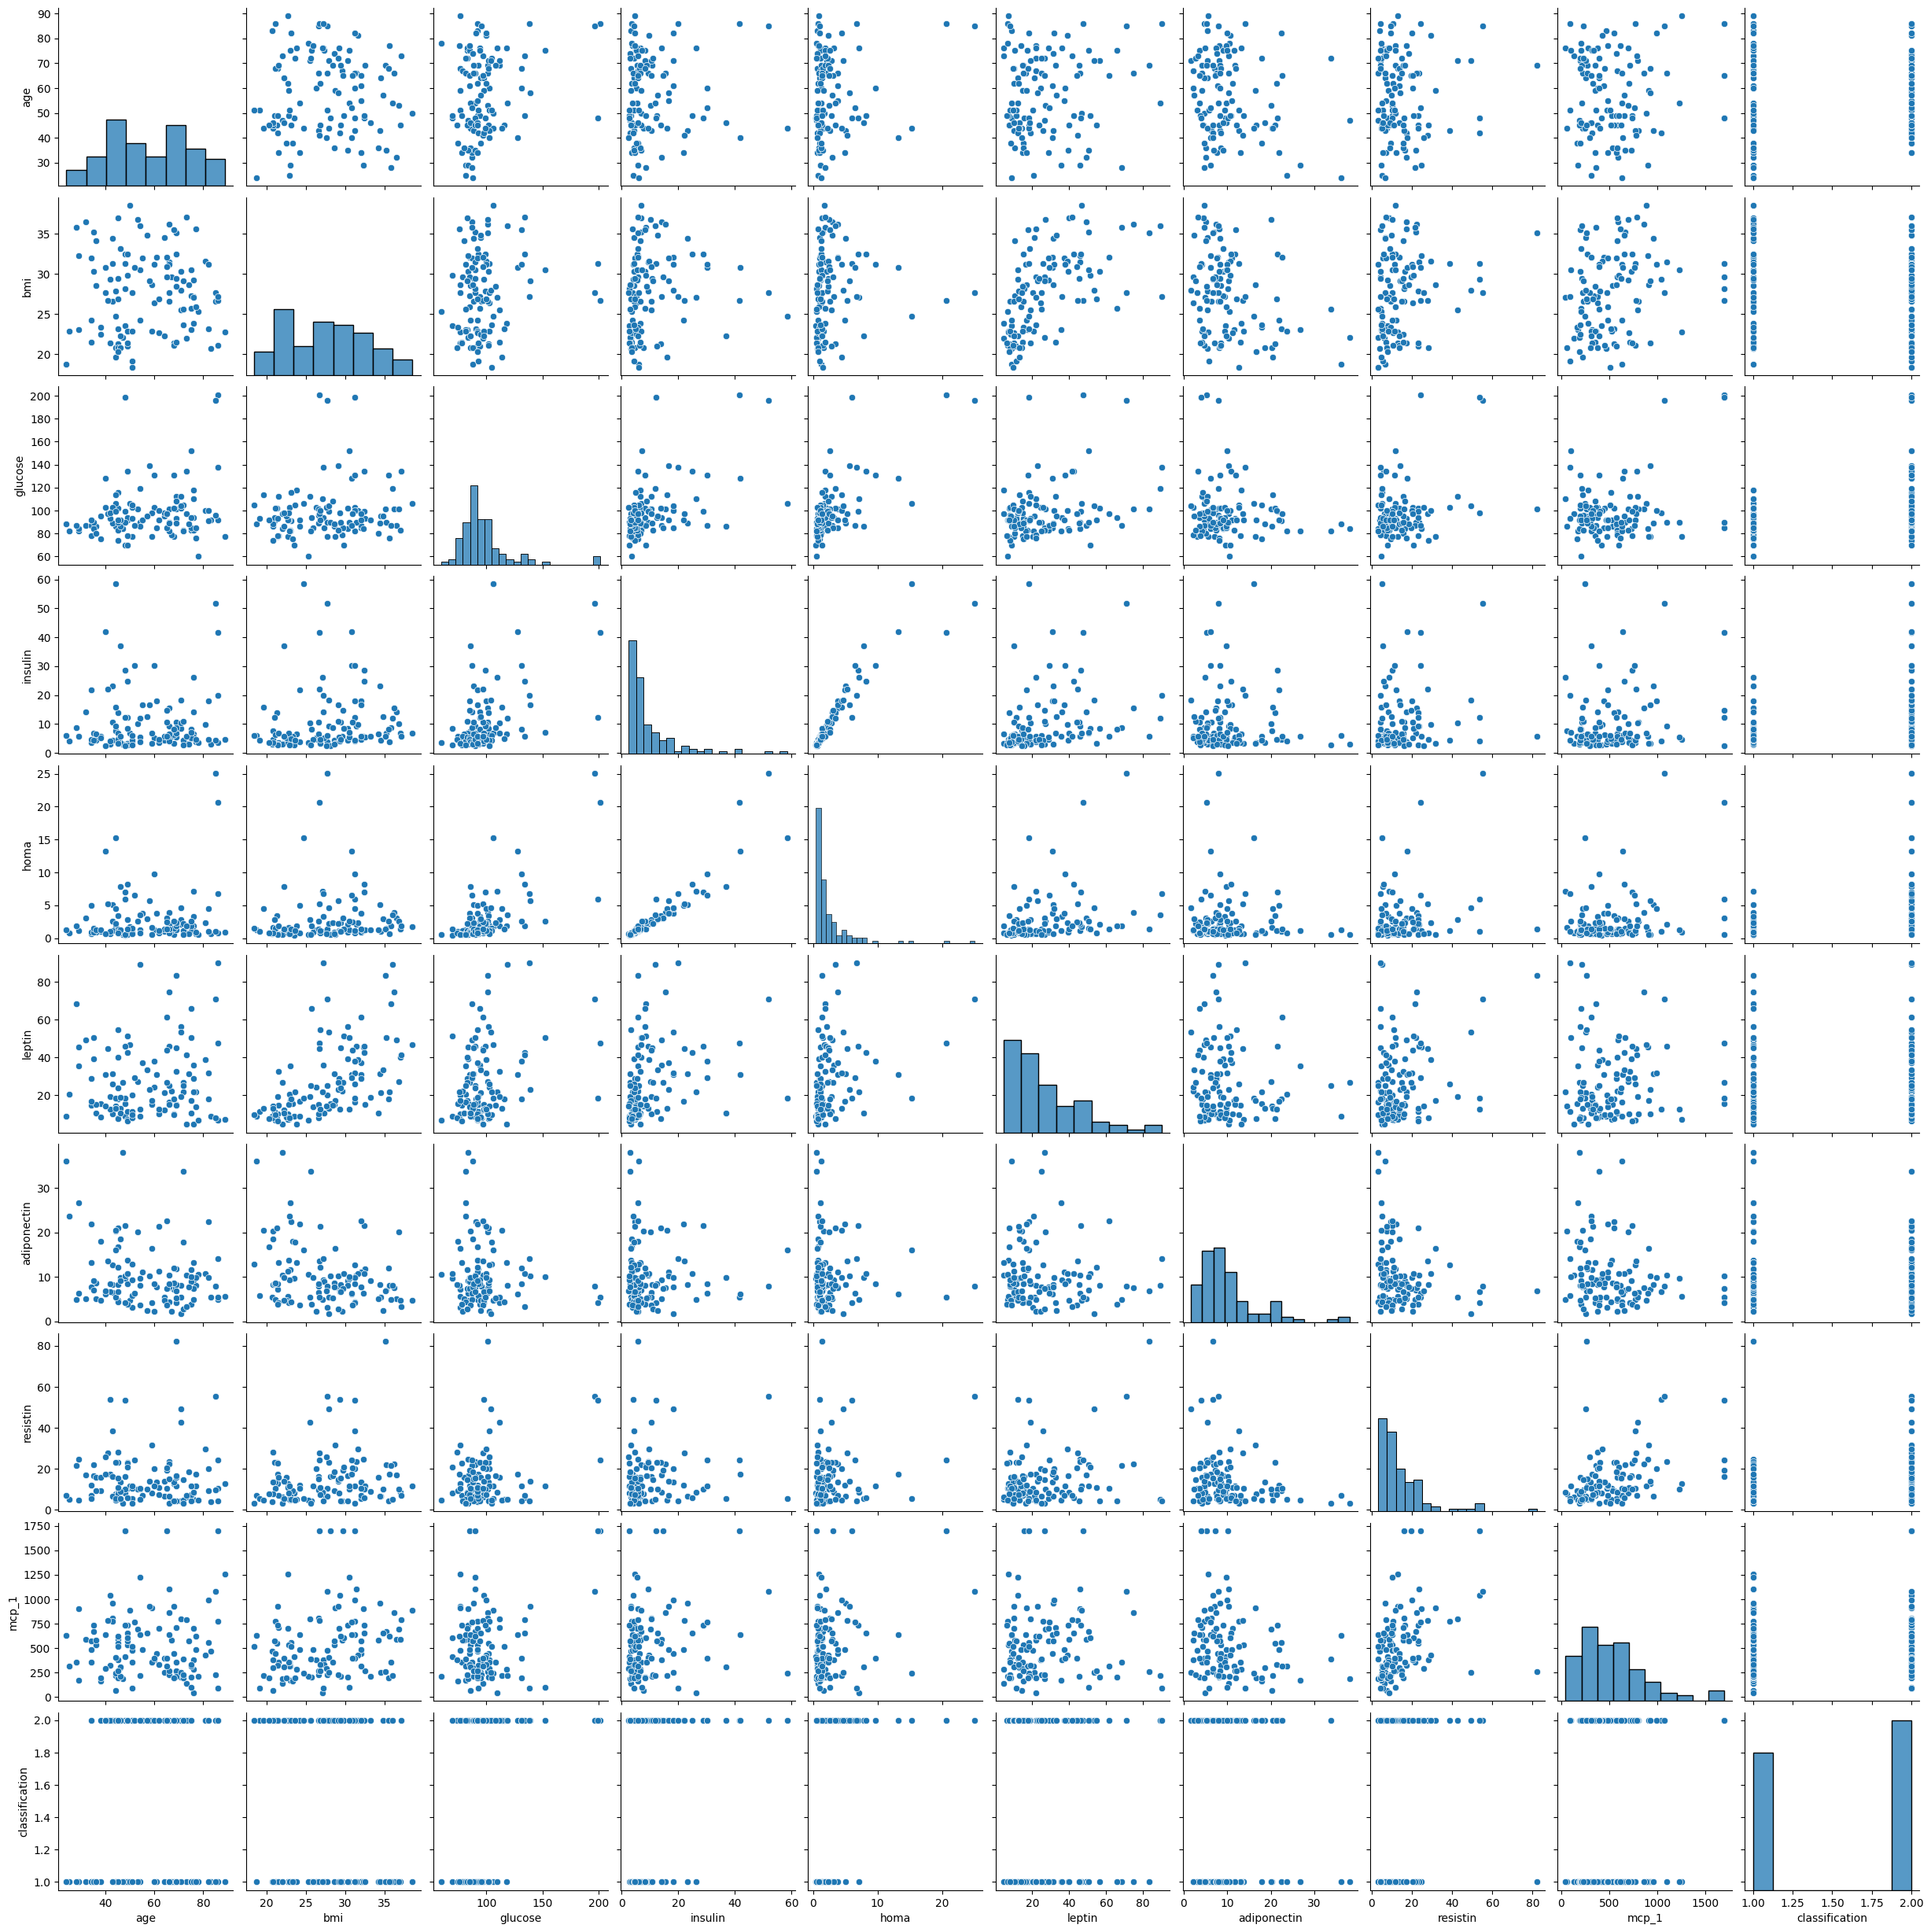

In [8]:
sns.pairplot(data)

In [9]:
# data clean up
data =data[pd.notnull(data[['glucose','insulin','homa']])]

In [10]:
# describe to data
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             0 non-null      float64
 1   bmi             0 non-null      float64
 2   glucose         116 non-null    int64  
 3   insulin         116 non-null    float64
 4   homa            116 non-null    float64
 5   leptin          0 non-null      float64
 6   adiponectin     0 non-null      float64
 7   resistin        0 non-null      float64
 8   mcp_1           0 non-null      float64
 9   classification  0 non-null      float64
dtypes: float64(9), int64(1)
memory usage: 9.2 KB


,count,mean,std,min,25%,50%,75%,max
age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glucose,116.0,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
insulin,116.0,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
homa,116.0,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
leptin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adiponectin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resistin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mcp_1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classification,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# find columns int and float
colum = data.select_dtypes(include = ["int64","float64"]).keys()
print(colum) 

Index(['age', 'bmi', 'glucose', 'insulin', 'homa', 'leptin', 'adiponectin',
       'resistin', 'mcp_1', 'classification'],
      dtype='object')


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'glucose'}>],
       [<Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'homa'}>,
        <Axes: title={'center': 'leptin'}>],
       [<Axes: title={'center': 'adiponectin'}>,
        <Axes: title={'center': 'resistin'}>,
        <Axes: title={'center': 'mcp_1'}>],
       [<Axes: title={'center': 'classification'}>, <Axes: >, <Axes: >]],
      dtype=object)

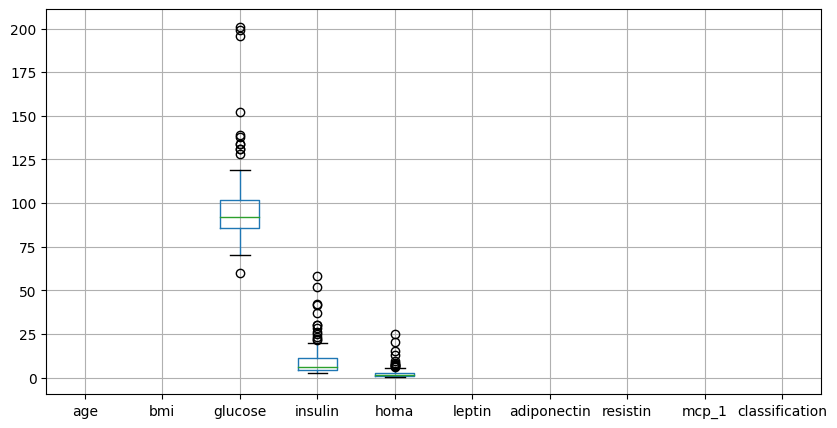

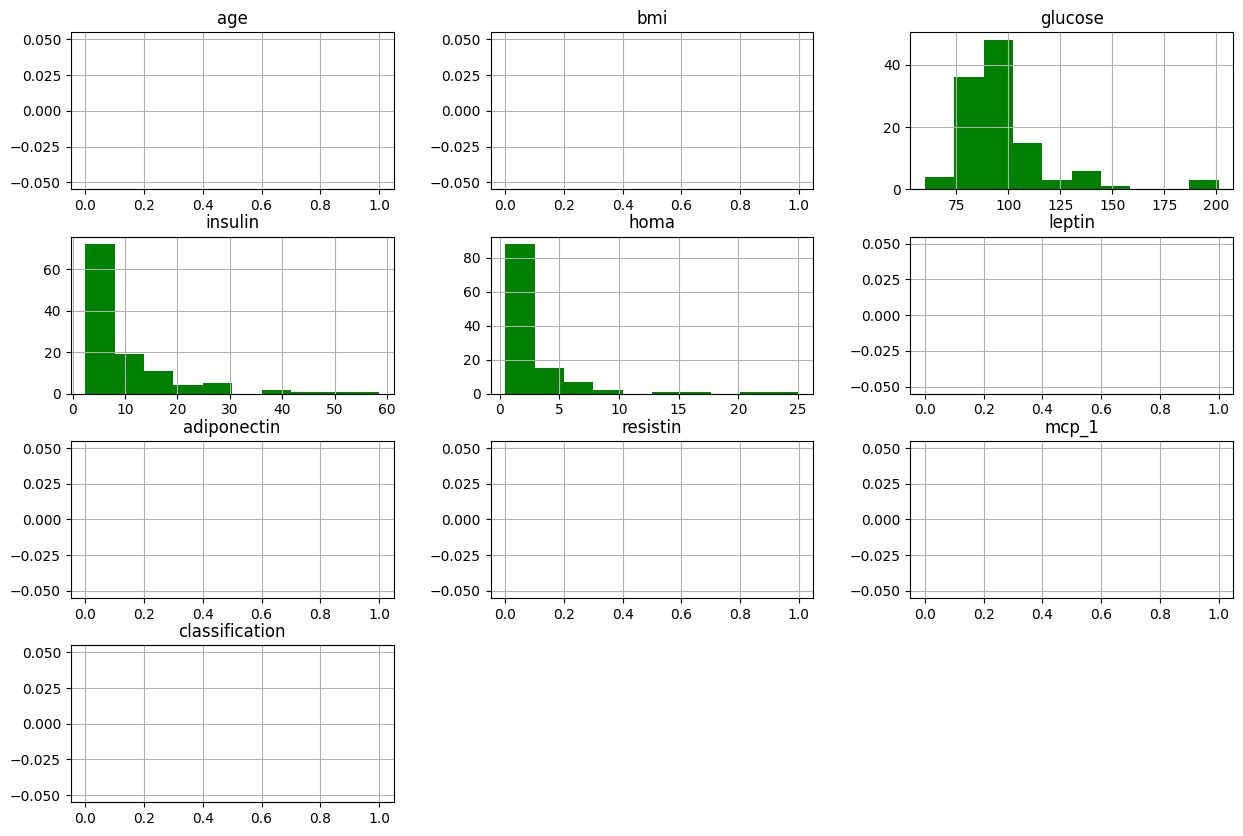

In [12]:
# Draw the columns
rcParams['figure.figsize'] = 10,5
data[colum].boxplot()
rcParams['figure.figsize'] = 15,10
data[colum].hist(color='g')

In [13]:
# normalized
rank_df=data.rank(method='first')
#normalized is subraction from average main on std
normalized_df=(rank_df-rank_df.mean())/rank_df.std()
normalized_df.head(10)# heading to first 10 rows 

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,NaN,NaN,-1.680030,-1.620560,-1.709765,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,-0.223013,-1.442150,-1.323210,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-0.252748,-0.698774,-0.698774,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-1.531355,-1.382680,-1.501620,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-0.193278,-1.115064,-1.025859,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,-0.163543,-1.352945,-1.263740,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,-1.501620,-0.550098,-0.906919,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.352945,0.133808,0.460893,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.341953,-1.293475,-1.055594,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,-1.174535,-0.460893,-0.669039,NaN,NaN,NaN,NaN,NaN


In [14]:
#select number the cluster and default is 8  
for n_cluster in [4,5,6,7,8]:
    kmeans=KMeans(n_clusters=n_cluster).fit(
        normalized_df[['glucose','insulin','homa']])# select the features its effect in living   
    
    silhouette_avg=silhouette_score(
        normalized_df[['glucose','insulin','homa']],
        kmeans.labels_) # edit distances between cluster
    print('Silhouette score for %i Clusters :%0.4f'%(n_cluster,silhouette_avg))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 Clusters :0.3789
Silhouette score for 5 Clusters :0.3766
Silhouette score for 6 Clusters :0.3998
Silhouette score for 7 Clusters :0.3963
Silhouette score for 8 Clusters :0.3964


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

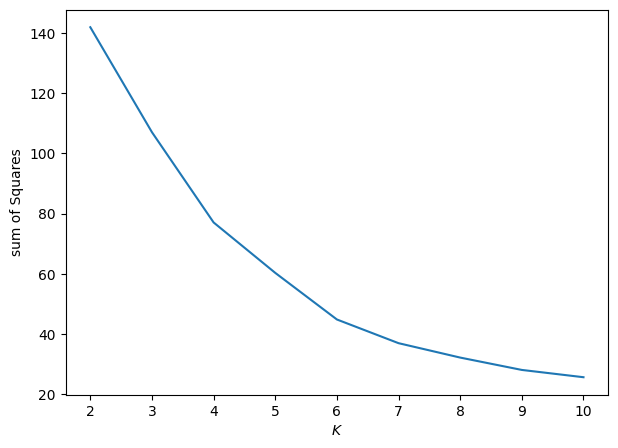

In [15]:
#predict and plot  
sse=[]
krange = list(range(2,11)) #work list starting from 1 and end by 10 and continu by 2
X= normalized_df[['glucose','insulin','homa']].values
for n in krange:
    model=cluster.KMeans(n_clusters=n,random_state=3)
    model.fit_predict(X) # work prediction to model
    cluster_assignments=model.labels_
    centers=model.cluster_centers_
    sse.append(np.sum((X-centers[cluster_assignments])**2))

rcParams['figure.figsize'] = 7,5
plt.plot(krange,sse)
plt.xlabel('$K$')
plt.ylabel('sum of Squares')


plt.show()

In [16]:
kmeans=KMeans(n_clusters=4).fit(normalized_df[['glucose','insulin','homa']]) # select kmeans to normalize or features
four_cluster_df=normalized_df[['glucose','insulin','homa']].copy(deep=True)
four_cluster_df['Cluster']=kmeans.labels_ #add new column and in it number cluster
four_cluster_df.head(10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,glucose,insulin,homa,Cluster
0,-1.680030,-1.620560,-1.709765,2
1,-0.223013,-1.442150,-1.323210,1
2,-0.252748,-0.698774,-0.698774,1
3,-1.531355,-1.382680,-1.501620,2
4,-0.193278,-1.115064,-1.025859,1
5,-0.163543,-1.352945,-1.263740,1
6,-1.501620,-0.550098,-0.906919,2
7,1.352945,0.133808,0.460893,0
8,0.341953,-1.293475,-1.055594,1
9,-1.174535,-0.460893,-0.669039,2


In [17]:
# select number clusters
cluster0_metrics=kmeans.cluster_centers_[0]
cluster1_metrics=kmeans.cluster_centers_[1]
cluster2_metrics=kmeans.cluster_centers_[2]
cluster3_metrics=kmeans.cluster_centers_[3]

data=[cluster0_metrics,cluster1_metrics,cluster2_metrics,cluster3_metrics]
cluster_center_df=pd.DataFrame(data) # edit cluster center to data freem  
cluster_center_df.colums=four_cluster_df.columns[0:4]
four_cluster_df

<ipython-input-17-764afa03202a>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cluster_center_df.colums=four_cluster_df.columns[0:4]


,glucose,insulin,homa,Cluster
0,-1.680030,-1.620560,-1.709765,2
1,-0.223013,-1.442150,-1.323210,1
2,-0.252748,-0.698774,-0.698774,1
3,-1.531355,-1.382680,-1.501620,2
4,-0.193278,-1.115064,-1.025859,1
...,...,...,...,...
111,0.014868,-1.323210,-1.174535,1
112,0.669039,-0.639304,-0.431158,1
113,0.431158,-0.133808,-0.044603,1
114,-1.204270,-1.561090,-1.590825,2


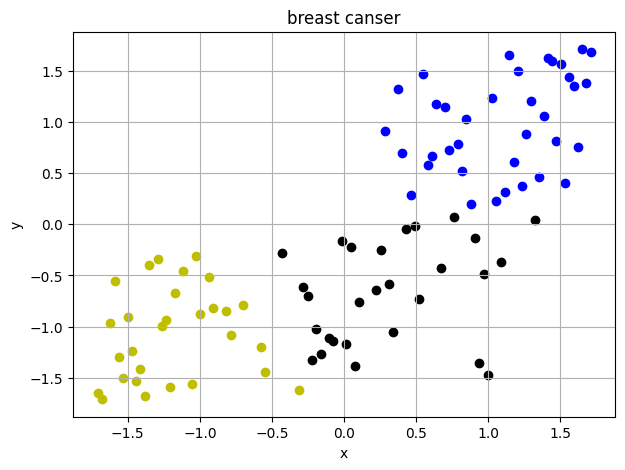

In [18]:
# drawing scatter to column glucose with homa
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['homa'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['homa'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['homa'],
c='y')


plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()

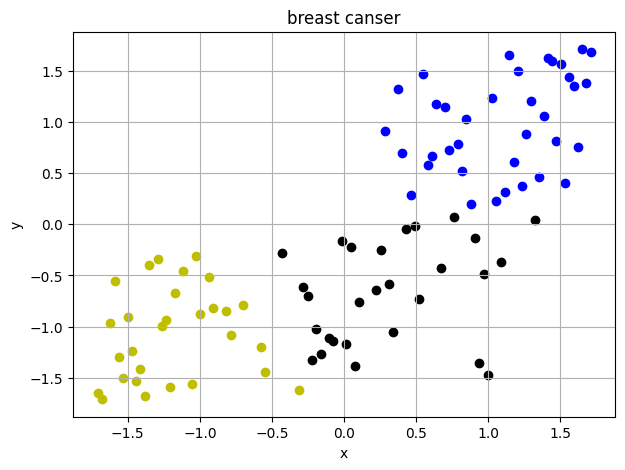

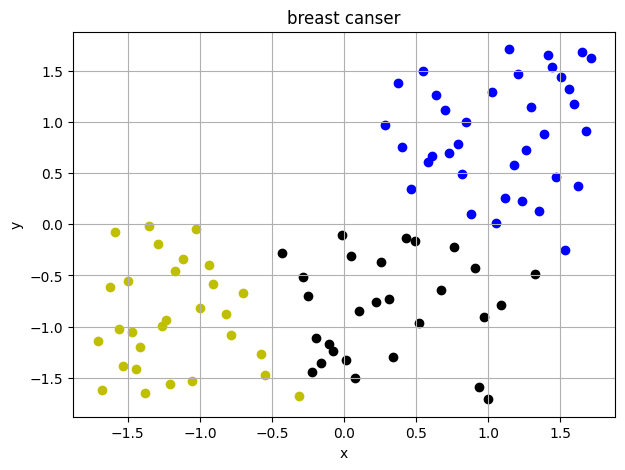

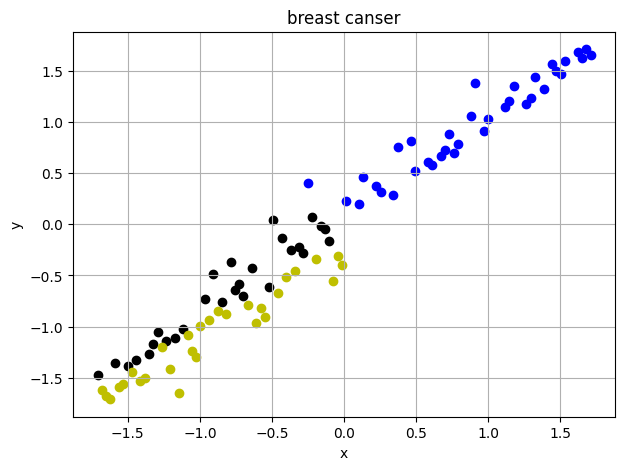

In [19]:
# drawing scatter to column glucose with homa
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['homa'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['homa'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['homa'],
c='y')
plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
# drawing scatter to column glucose with insulin
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['insulin'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['insulin'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['insulin'],
c='y')
plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
# drawing scatter to column insulin with homa
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['insulin'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['homa'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['insulin'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['homa'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['insulin'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['homa'],
c='y')

plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#5. Divide Data set in to training and validation sets

In [20]:
# import modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# read the dataset
df = pd.read_csv('/content/sample_data/BREASTCANCER.csv')

# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.05, random_state=0)


In [21]:
X_test

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1
10,34,21.470000,78,3.469,0.667436,14.5700,13.110000,6.92000,354.600
74,46,22.210000,86,36.940,7.836205,10.1600,9.760000,5.68000,312.000
66,54,24.218750,86,3.730,0.791257,8.6874,3.705230,10.34455,635.049
51,77,25.900000,85,4.580,0.960273,13.7400,9.753260,11.77400,488.829
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.37010,1698.440


In [22]:
y_test

10    1
74    2
66    2
51    1
7     1
78    2
Name: classification, dtype: int64

#6. Perform training 


In [23]:
X_train

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1
92,52,30.801249,87,30.212,6.483495,29.2739,6.268540,24.24591,764.667
90,40,30.836531,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261
107,46,33.180000,92,5.750,1.304867,18.6900,9.160000,8.89000,209.190
62,49,21.367521,78,2.640,0.507936,6.3339,3.886145,22.94254,737.672
30,66,36.212279,101,15.533,3.869788,74.7069,7.539550,22.32024,864.968
...,...,...,...,...,...,...,...,...,...
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
67,64,22.222222,98,5.700,1.377880,12.1905,4.783985,13.91245,395.976
64,59,22.832879,98,6.862,1.658774,14.9037,4.230105,8.20490,355.310
47,78,25.300000,60,3.508,0.519184,6.6330,10.567295,4.66380,209.749


In [24]:
y_train

92     2
90     2
107    2
62     2
30     1
      ..
112    2
67     2
64     2
47     1
44     1
Name: classification, Length: 110, dtype: int64

#7....Perform Validation

In [25]:
def read_file():
    df = pd.read_csv('/content/sample_data/BREASTCANCER.csv')
    if(df.empty):
        print ('CSV file is empty')
    else:
        print ('CSV file is not empty')
        return df

In [26]:
df = read_file()

CSV file is not empty


In [27]:
import pandas as pd
df = pd.read_csv('/content/sample_data/BREASTCANCER.csv', nrows=2)
for dtype in df.dtypes.iteritems():
    print(dtype)

('age', dtype('int64'))
('bmi', dtype('float64'))
('glucose', dtype('int64'))
('insulin', dtype('float64'))
('homa', dtype('float64'))
('leptin', dtype('float64'))
('adiponectin', dtype('float64'))
('resistin', dtype('float64'))
('mcp_1', dtype('float64'))
('classification', dtype('int64'))


<ipython-input-27-82e3a9a881b0>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for dtype in df.dtypes.iteritems():


In [28]:
import pandas as pd
data = pd.read_csv('/content/sample_data/BREASTCANCER.csv')
df = df[sorted(data)]
validation = df
validation['age'] = validation['leptin'].apply(lambda x: True if x in df else False)
validation = validation[validation['age'] == True].reset_index()
df

,adiponectin,age,bmi,classification,glucose,homa,insulin,leptin,mcp_1,resistin
0,9.702400,False,23.500000,1,70,0.467409,2.707,8.8071,417.114,7.99585
1,5.429285,False,20.690495,1,92,0.706897,3.115,8.8438,468.786,4.06405


In [29]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
        except ValueError:
            pass
print(df.dtypes)

adiponectin       float64
age                  bool
bmi               float64
classification      int64
glucose             int64
homa              float64
insulin           float64
leptin            float64
mcp_1             float64
resistin          float64
dtype: object


In [30]:
for col in df.columns:
    miss = df[col].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(col,miss))
    else:
        print("{} has NO missing value!".format(col))



adiponectin has NO missing value!
age has NO missing value!
bmi has NO missing value!
classification has NO missing value!
glucose has NO missing value!
homa has NO missing value!
insulin has NO missing value!
leptin has NO missing value!
mcp_1 has NO missing value!
resistin has NO missing value!


#8... Report Accuracy of your trained ML Model.


In [31]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score

#define array of actual classes
actual = np.repeat([1, 0], repeats=[20, 380])

#define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats=[15, 5, 5, 375])

#calculate balanced accuracy score
balanced_accuracy_score(actual, pred)

0.868421052631579

0.868421052631579

In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [33]:
print(accuracy_score(ytest, model.predict(xtest)))

1.0


In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions1 = logreg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[1 2]
 [0 3]]


              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [36]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.6666666666666666
